<a href="https://colab.research.google.com/github/WoradeeKongthong/object_detection_MaskRCNN/blob/master/Mask_RCNN_stepbystep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the Mask R-CNN library

In [1]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/My\ Drive/object_detection_with_MaskRCNN/Mask_RCNN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/object_detection_with_MaskRCNN/Mask_RCNN


In [6]:
!pwd

/content/drive/My Drive/object_detection_with_MaskRCNN/Mask_RCNN


In [3]:
! python Mask_RCNN/setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
error: package directory 'mrcnn' does not exist


In [6]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Requires: 
Required-by: 


In [7]:
# get back to out project directory
%cd ..
!pwd

/content/drive/My Drive/object_detection_with_MaskRCNN
/content/drive/My Drive/object_detection_with_MaskRCNN


# Load the model

In [2]:
%tensorflow_version 1.X
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.X`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [3]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

In [4]:
# define the model
# Note : mode inference indicate that we are making prediction not training
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [8]:
# load coco model weights
# Note : the pre-trained weights ('mask_rcnn_coco.h5') can be downloaded from https://github.com/matterport/Mask_RCNN/releases/tag/v2.0
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)

In [59]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Load an image

In [52]:
filename = 'elephant.jpg'

In [11]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

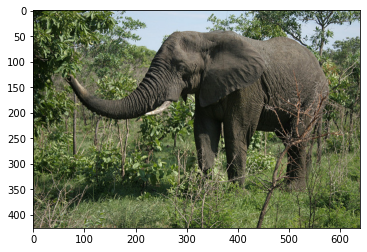

In [53]:
image = load_img(filename)
plt.imshow(image)

In [54]:
# convert image to numpy array
image = img_to_array(image)
print(image.shape)

(426, 640, 3)


# Object Detection

In [55]:
# perform object detection
results = rcnn.detect([image], verbose=0)

In [56]:
# explore the results
print(type(results))
print(len(results))
print(type(results[0]))
print(results)

<class 'list'>
1
<class 'dict'>
[{'rois': array([[ 30,  54, 360, 586]], dtype=int32), 'class_ids': array([21], dtype=int32), 'scores': array([0.9999379], dtype=float32), 'masks': array([[[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       ...,

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]],

       [[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]]])}]


In [57]:
boxes = results[0]['rois']
print(boxes)

[[ 30  54 360 586]]


# Results

In [40]:
from matplotlib.patches import Rectangle

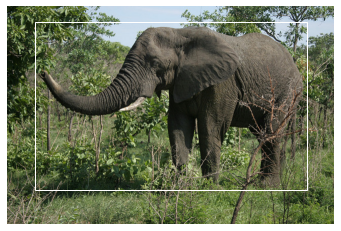

In [58]:
# visualize the results

# load an image as numpy array
data = plt.imread(filename)
plt.imshow(data)
# get current axis
ax = plt.gca()
# plot each box
for box in boxes:
  # get coordinates
  y1, x1, y2, x2 = box
  # calculate width and height
  width, height = x2 - x1, y2 - y1
  # create rectangle
  rect = Rectangle((x1, y1), width, height, fill=False, color='white')
  # draw the box (rectangle)
  ax.add_patch(rect)
plt.axis('off')
plt.show()

# Show results with mrcnn.visualize.display_instances

In [ ]:
from mrcnn.visualize import display_instances

In [65]:
r = results[0]

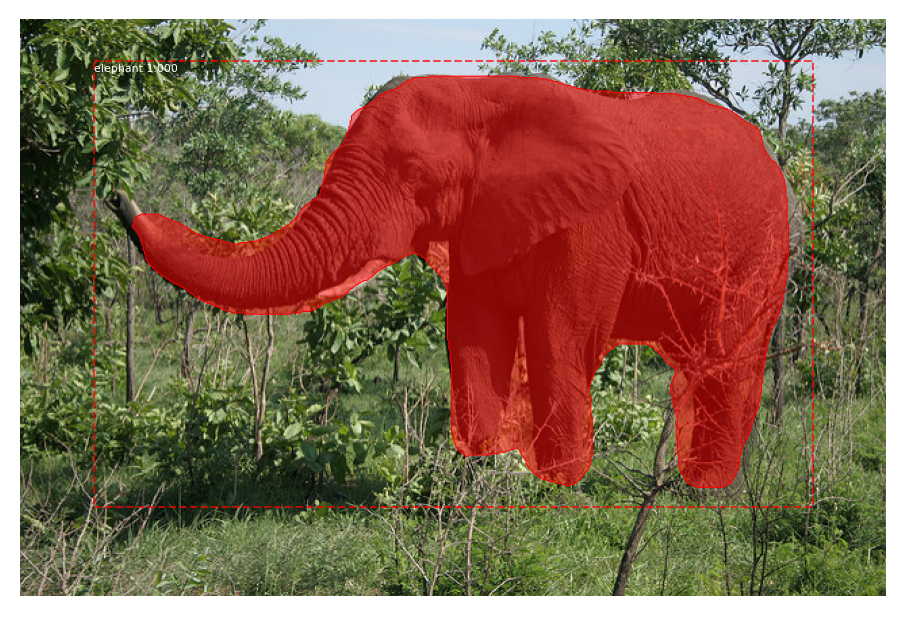

In [66]:
# draw both bounding boxes and mask
display_instances(data, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

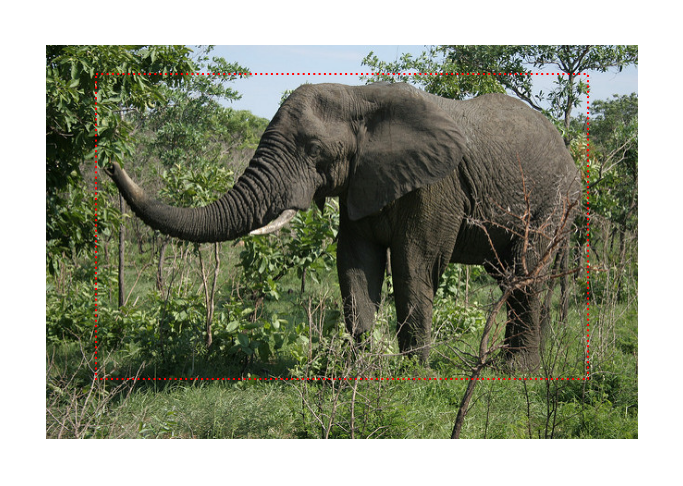

In [73]:
# draw only boxes
from mrcnn.visualize import draw_boxes
draw_boxes(data, r['rois'])

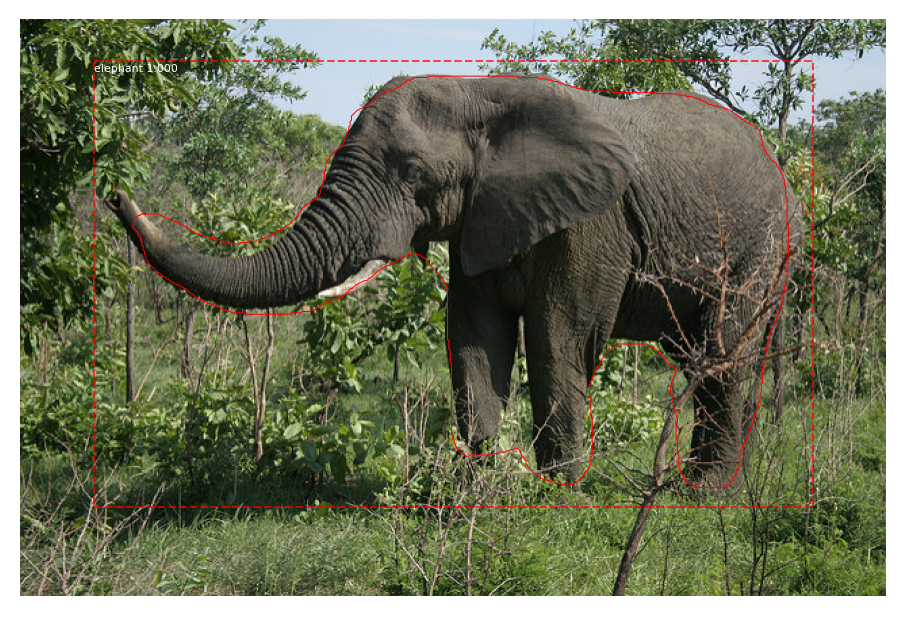

In [74]:
# not showing mask
display_instances(data, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'], show_mask=False)

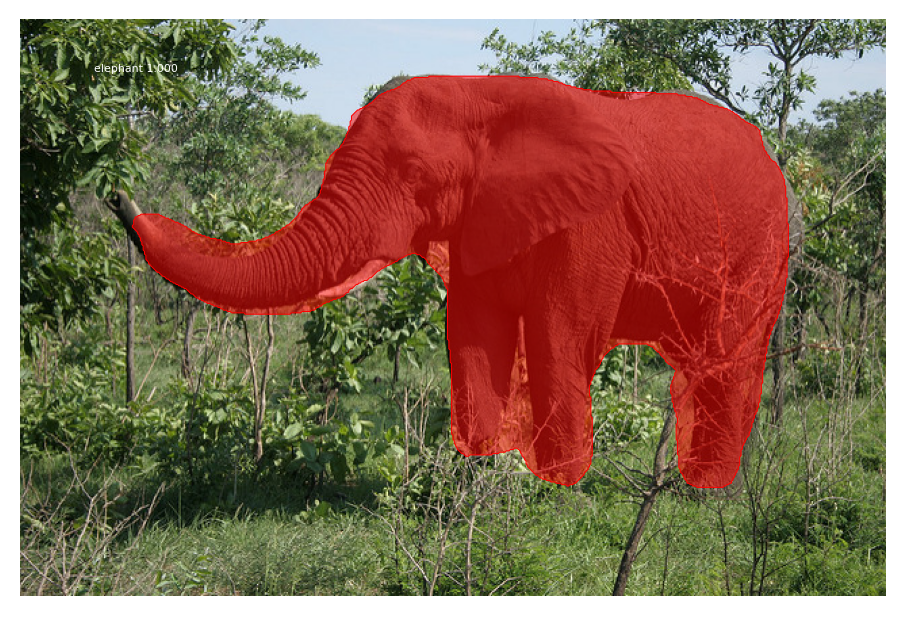

In [75]:
# not showing bounding box
display_instances(data, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'], show_bbox=False)